# Booking.com Data Job Analysis
***
<p align="center">
<img src="Images/booking_logo.jpg" style>
</p>

### Introduction
_Passing by the Booking.com offices aboard a ferry on my daily commute I wondered, **what would it take to work for one of the world's biggest travel companies?**_

*I got inspired by their story - growing from a small Dutch startup in 1996 to leading digital travel company, and decided to talk to some of their employees. Throughout these talks it became apparent that their strong focus on creating an environment for learning and experimenting stood at the foundation of creating innovative solutions and value for its customers. These values resonated with me, and helped fuel this experiment.*

*Coming from a background in Architecture I've always had a strong interest in translating questions into insights, taking the conceptual and turning it into reality. But what transferable skills do I have?
Seeking out job requirements on the Booking.com career platform it soon became apperent that my passion for data, optimalization, python would be of use. Great, let's apply! Resume and covering letter at the ready, I stumble accross their hiring process:*

<p align="center">
<img src="Images/booking_ai.jpg" style>
</p>

*No cover letter, no person reading resumes, no applying to specific positions. Instead:*

>**We rely on AI to analyse your CV and enrich it with market data to get a well rounded skill set overview. Consequently, your skills will be matched with the best available career opportunity.**

_This sentence sparked my interest and started this project. **What if I could use a data-driven approach to tailor my resume to the positions I'm interested in?**_
***

### Project Objective

To create a clear outline and direction we start with our defining our goal for this project.

**Research Question: What skills and experiences are most relevant for Data-related positions at Booking.com?**

Key questions:
- How many data-related positions are available?
- What positions are available how are they segmented?
- What impact does location have on availibilty and type of job?
- What skills, education, experiences are most coveted by Booking.com?



### Methodology
- Reading in raw data from web scraper
- Cleaning up data / string manipulation
- Exploratory Analysis to understand data
- Delving into specifics to answer key questions


### Data
- All data was obtained through webscraping the [Booking.com career website](https://jobs.booking.com/careers) on 08-02-2022
- Webscraper can be found at [Web Scraper/Web_Scraper_Booking_Career.ipynb](https://github.com/niekvanderzwaag/Booking.com/blob/main/Web%20Scraper/Web_Scraper_Booking_Career.ipynb)
***

# Imports

In [1]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 50)
pd.options.display.max_colwidth = 500
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#String manipulations
import re, string
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag

#NLTK Packages: Un-comment lines below to download relevant NLTK packages
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

#Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import seaborn as sns
import itertools

#Plot output
%matplotlib inline
plt.rcParams['figure.figsize'] = [18,10]
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'

#Booking.com colorscheme RGBA
blue_d = np.array([0/256, 53/256, 128/256, 1])
blue_l = np.array([0/256, 159/256, 227/256, 1])
yellow = np.array([254/256, 186/256, 2/256, 1])
grey = np.array([102/256, 102/256, 102/256, 1])
white = np.array([242/256, 246/256, 250/256, 1])

#Booking.com colormaps (RGBA)
cmap1 = ListedColormap([blue_d])
cmap2 = ListedColormap([blue_d,blue_l])
cmap3 = ListedColormap([blue_d,blue_l,yellow])
cmap4 = ListedColormap([blue_d,blue_l,yellow,grey])
cmap5 = ListedColormap([blue_d,blue_l,yellow,grey,white])

#Booking.com palletes (Hex)
c1 = ['#003580']
c2 = ['#003580', '#009fe3']
c3 = ['#003580', '#009fe3', '#feba02']
c4 = ['#003580', '#009fe3', '#feba02', '#666']
c5 = ['#003580', '#009fe3', '#feba02', '#666', '#f2f6fa']

#Booking.com settings Seaborn
sns.set(rc={'axes.facecolor':'#f2f6fa', 'figure.facecolor':'#f2f6fa'})
sns.set_palette(sns.color_palette(c3))

#Wordcloud
from wordcloud import WordCloud

#Quality of life
from IPython.display import display
pd.set_option('colheader_justify', 'left')
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
%precision %.2f
%precision 2

import warnings
warnings.filterwarnings('ignore')

# Data

The raw data received from the web scraper requires a bit of tidying up. Apart from the Job Title the dataframe consists mainly of long strings that needs to be made legible within the scope of this project. Let's first read in the data and look at the statistics to get a grasp of the job descriptions.

In [2]:
df = pd.read_csv('Booking_Jobs_All.csv')

In [3]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (657, 2)


,Job Title,Job Description
0,Lead Sourcer - Tech,"Lead Sourcer - Technology Recruitment\nWe are a truly international team, therefore this position can be based in Amsterdam, Manchester, Dublin or London!\nAt Booking we have are going through the exciting transition of building a sourcing function from the ground up and are looking for a Lead Technology Sourcer to join our new team!\nAs a Lead Sourcer, you will be responsible for owning and managing the sourcing strategy for your designated talent segment within technology hiring. You will..."
1,Senior Data Scientist - Accommodations,"Booking.com is looking for data savvy professionals to join our team of data scientists. You will be working with stakeholders throughout the company to generate understanding, strategy and suggest actions based on data. If you consider yourself to be that unique hybrid of data hacker, business analyst, communicator and mentor that maintains a strong customer focus and values pragmatism over perfection, then we’d like to hear from you.\nThere are several data science teams within Booking.com..."
2,Senior Data Analyst - Accommodations,"At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code or A/B tests. We’re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we make it easier for everyone to experience the world. \nWith over 1.6 million room nights booked every day..."
3,UX Designer,"About this role\nAt Booking.com our mission is to make it easier for everyone to experience the world. \nWorking in collaboration with leading industry partners, our insurance products are designed to give customers assurance they have the protection they need to allow them to relax and enjoy the trip - great value cover backed by a first class experience should they need to make a claim.\nWe are looking for a UX Designer to join our team on this exciting journey and help us improve our exi..."
4,Account Manager - Sochi,"The Company\n\nIt wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few taps on our smartphone.\n\nIn fact, that’s what we do at Booking.com. We make it easier for everyone to experience the world. And while that world might feel a little farther away right now, we’re busy preparing for when the world is ready to travel once more.\n\nAcross our offices wor..."


In [4]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        657 non-null    object
 1   Job Description  657 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


***

## Statistical feautures - Raw text baseline

We'll start by creating a baseline from the raw data by looking at some general statistics and adding new statistical features related to the Job Description.

1. **Word Count** - Total number of words
2. **Character Count** - Total number of characters excluding spaces   
3. **Word Density** - Average length of the words used  
4. **Punctuation Count** - Total number of punctuations used

In [5]:
df['Job Description'] = df['Job Description'].apply(lambda x : re.sub('\\\n',' ', x)) #Replace all newlines
df['R_word_count'] = df['Job Description'].apply(lambda x : len(x.split())) #Splitting strin into words
df['R_char_count'] = df['Job Description'].apply(lambda x : len(x.replace(' ',''))) #Removing spaces and counting characters
df['R_word_density'] = df['R_word_count'] / (df['R_char_count'] + 1) #Devide total words by number of characters
df['R_punc_count'] = df['Job Description'].apply(lambda x : len([a for a in x if a in string.punctuation])) #Count punctuation by comparing to string.punctuation

df_stats_raw = df[['Job Title','R_word_count', 'R_char_count', 'R_word_density', 'R_punc_count']]
df_stats_raw.head()

,Job Title,R_word_count,R_char_count,R_word_density,R_punc_count
0,Lead Sourcer - Tech,377,2249,0.17,38
1,Senior Data Scientist - Accommodations,401,2330,0.17,71
2,Senior Data Analyst - Accommodations,805,4754,0.17,109
3,UX Designer,556,3185,0.17,70
4,Account Manager - Sochi,705,3844,0.18,99


### Word Count

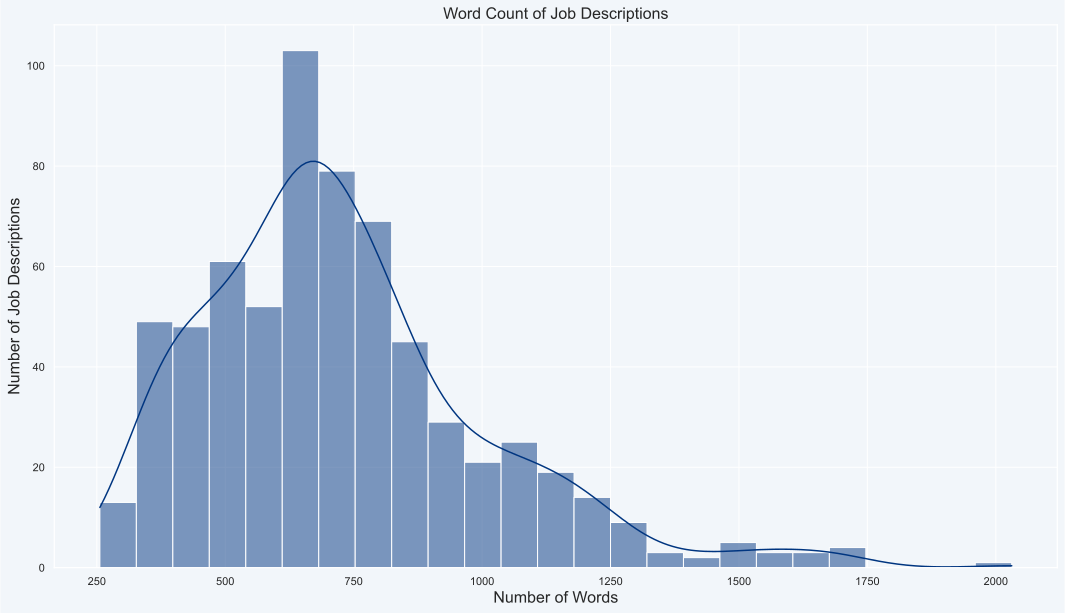

In [6]:
sns.histplot(data=df_stats_raw, x='R_word_count', bins=25, palette=c1, kde=True)

plt.xlabel('Number of Words', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Word Count of Job Descriptions', fontsize=16);

In [7]:
print('The average word count for a Job Description is {:1.0f} words'.format(df_stats_raw['R_word_count'].mean()))
print('The longest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_word_count'].idxmax()][0],df_stats_raw['R_word_count'].max()))
print('The shortest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_word_count'].idxmin()][0],df_stats_raw['R_word_count'].min()))

The average word count for a Job Description is 726 words
The longest Job Description is for Director Legal Trips - Product & Commercial, with a word count of 2031 words
The shortest Job Description is for Office Manager (6 Month Contract), with a word count of 256 words


In [8]:
df_stats_raw[df_stats_raw['R_word_count'] > 1000]

,Job Title,R_word_count,R_char_count,R_word_density,R_punc_count
17,"Commercial Director, Insurance",1280,7779,0.16,246
42,Team Leader IT support,1277,7630,0.17,177
43,Head of Human Resources/ HR Leader,1122,6630,0.17,198
47,Technical Product Manager - Insurance,1122,6320,0.18,116
48,Leader - Centre of Excellence,1186,7320,0.16,166
...,...,...,...,...,...
578,"Group Product Manager, FinTech - RegTech",1064,5897,0.18,158
625,Engineering Manager - China Tech,1104,6157,0.18,128
631,Senior Data Engineer - FinTech,1084,6210,0.17,173
650,Java Developer,1121,6007,0.19,113


In [9]:
print('Job Descriptions over 1500 words long: {:.2f}%'.format((df_stats_raw[df_stats_raw['R_word_count'] > 1000].count()[0] / df_stats_raw.shape[0]) * 100))

Job Descriptions over 1500 words long: 15.07%


### Inference:
> - 50% of all Job Descriptions fall between roughly 500-900 words
> - 15% of Job Descriptions count over 1000 words, mostly for Senior/Director level jobs

### Character Count

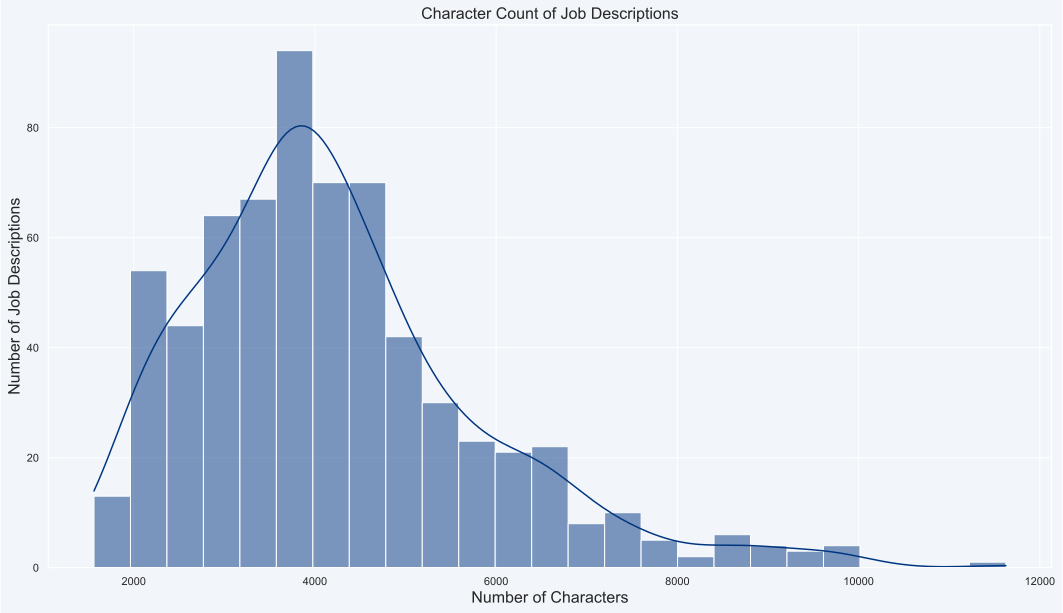

In [10]:
sns.histplot(data=df_stats_raw, x='R_char_count', bins=25, palette=c1, kde=True)

plt.xlabel('Number of Characters', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Character Count of Job Descriptions', fontsize=16);

In [11]:
print('The average word count for a Job Description is {:1.0f} words'.format(df_stats_raw['R_char_count'].mean()))
print('The longest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_char_count'].idxmax()][0],df_stats_raw['R_char_count'].max()))
print('The shortest Job Description is for {}, with a word count of {} words'.format(df_stats_raw.iloc[df_stats_raw['R_char_count'].idxmin()][0],df_stats_raw['R_char_count'].min()))

The average word count for a Job Description is 4217 words
The longest Job Description is for Director Legal Trips - Product & Commercial, with a word count of 11625 words
The shortest Job Description is for Outbound Executive - Taipei, with a word count of 1562 words


### Inference:
> - Similar in distribution to the word count graph
> - 50% of all Job Descriptions fall between roughly 3.000-5.000 characters

### Word Density

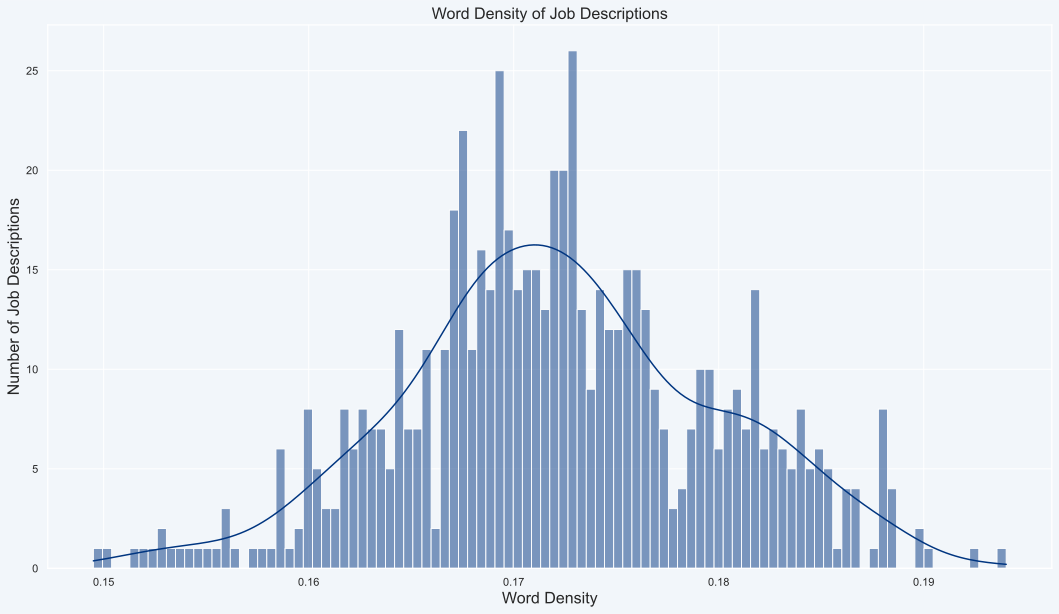

In [12]:
sns.histplot(data=df_stats_raw, x='R_word_density', bins=100, palette=c1, kde=True)

plt.xlabel('Word Density', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Word Density of Job Descriptions', fontsize=16);

In [13]:
print('The average word density for a Job Description is {:.3f}'.format(df_stats_raw['R_word_density'].mean()))
print('The Job Description {} has the highest word density: {:.3f}'.format(df_stats_raw.iloc[df_stats_raw['R_word_density'].idxmax()][0],df_stats_raw['R_word_density'].max()))
print('The Job Description {} has the lowest word density: {:.3f}'.format(df_stats_raw.iloc[df_stats_raw['R_word_density'].idxmin()][0],df_stats_raw['R_word_density'].min()))

The average word density for a Job Description is 0.172
The Job Description Senior Engineering Manager, App Core Experience - Mobile has the highest word density: 0.194
The Job Description Account Manager - Düsseldorf (m/f/d) has the lowest word density: 0.149


### Inference:
> - With excpetions of a few outliers the Word Density almost follow a normal distribution centered around 0.172
> - 50% of all Job Descriptions have a Word Density between 0.167 and 0.177

### Punctuation Count

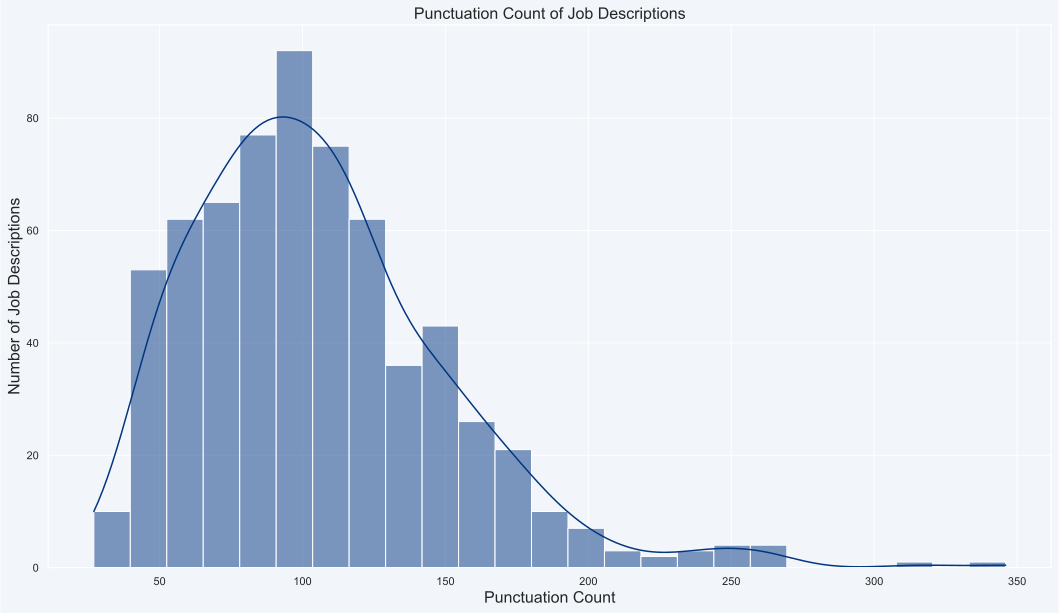

In [14]:
sns.histplot(data=df_stats_raw, x='R_punc_count', bins=25, palette=c1, kde=True)

plt.xlabel('Punctuation Count', fontsize=16)
plt.ylabel('Number of Job Descriptions', fontsize=16)
plt.title('Punctuation Count of Job Descriptions', fontsize=16);

In [15]:
print('The average punctuation count for a Job Description is {:.0f} punctuation marks'.format(df_stats_raw['R_punc_count'].mean()))
print('The highest punctuation count is for {}, with a total of {} punctuation marks'.format(df_stats_raw.iloc[df_stats_raw['R_punc_count'].idxmax()][0],df_stats_raw['R_punc_count'].max()))
print('The lowest punctuation count is for {}, with a total of {} punctuation marks'.format(df_stats_raw.iloc[df_stats_raw['R_punc_count'].idxmin()][0],df_stats_raw['R_punc_count'].min()))

The average punctuation count for a Job Description is 106 punctuation marks
The highest punctuation count is for Director Legal Trips - Product & Commercial, with a total of 346 punctuation marks
The lowest punctuation count is for Team Operations Coordinator, with a total of 27 punctuation marks


### Inference:
> - Generally, Job Descriptions have 106 punctuation marks
> - Unsurprisingly, there is a strong correlation between amount of punctuation marks and total words used

***

# Text Pre-processing

In order to prepare our text for analysis we need to transform it to be more meaningful. This process will look as follows:

>1. Create lowercase
>2. Tokenization
>3. Removing Stopwords
>4. Normalization 
>5. Removing Punctuation
>6. Character Removal

**1. Create lowercase**
The first step towards a cleaned text is removing obstacles that make comparison more difficult. An easy way to start is by using lowercase for all text to ignore capitalization.

**2. Tokenization**
Tokenisation is a technique for breaking down a piece of text into small units, called tokens. A token may be a word, part of a word or just characters like punctuation.

**3. Removing Stopwords**
Stopwords are frequently used words such as I, a, an, in etc. They do not contribute significantly to the information content of a sentence, so it is advisable to remove them by storing a list of words that we consider stopwords. The library nltk has such lists for 16 different languages that we can refer to.

**4. Normalization**
Text normalization tries to reduce the randomness in text and bring it closer to a predefined standard. This has the effect of reducing the amount of different information and thus improving efficiency. There are two methods for this:

1. Stemming: reducing words to their root or root form (e.g. _Caring_ becomes _Car_)
2. Lemmatization: reducing words to their base word (e.g. _Caring_ becomes _Care_)

The aim of these normalization techniques is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. However, the lemmatization algorithms try to reduce the inflected words correctly so that the affiliation of the base word to the language is guaranteed. This aligns better with our project goals, so we'll only use lemmatization as a normalization technique.

Lemmatization uses context to establish which grammatical group a word belongs to (noun, adjective, verb, etc.), called Part-of-speech tagging (POS tagging). Because only one of these tags can be applied when lemmatizing **we start by creating a function that aims to find the correct POS tag before cleaning the text.**

**5. Removing Punctuation**
Punctuation is essentially a set of symbols that offer little in terms of understanding our text as words. Tokenization splits text into words, but it also into punctuation marks. So removing these symbols creates a set of words and parts of words whilst removing the noise.

**6. Character Removal**
After tokenization and the removal of punctuation we can still be left with single/double characters. Most of these will be of no added value to our analysis, with the exception of the programming language R.

In [16]:
def get_pos_func(word):
    '''
    Maps the respective POS tag of a word to the format accepted by the Wordnet lemmatizer
    
    Args:
        word (str): Word to which the function is to be applied
    
    Returns:
        POS tag, readable for the Wordnet lemmatizer
    '''     
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [17]:
def clean_string_func(text, x):
    '''
    Create cleaned text or list of words
    
    Step 1: Use word_tokenize() to get tokens from lowered string
    Step 2: Use WordNetLemmatizer() to lemmatize the created tokens
            POS tag is determined with the help of function get_wordnet_pos()
    Step 3: Remove stopwords by iterating through tokens
    Step 4: Remove single characters by iterating through tokens
    Step 5: Remove punctuation by iterating through tokens
    Step 6: Join words to create text
    
    Args:
        text (str): String to which the functions are to be applied, string
        x (str): Letter that denotes return type ('w' = words, otherwise text)
    
    Returns:
        List of lemmatize words
        String with lemmatized words
    ''' 
    words = word_tokenize(text.lower()) #Create tokens from text and transform to lowercase
    words = [WordNetLemmatizer().lemmatize(word, get_pos_func(word)) for word in words] #Lemmatize words through appropriate POS from get_pos_func
    words = [wrd for wrd in words if wrd not in stopwords.words('english')] #Remove all words that appear in stopword list
    words = [wrd for wrd in words if len(wrd) > 2 and len(wrd) != 'r'] #Remove single character words that's not programming language R
    words = [wrd for wrd in words if wrd not in string.punctuation] #Remove punctuation
    text = ' '.join(words) #Join words to create text

    if x == 'w':
        return words
    return text

Let's take a look at what a Job Description looks like before and after cleaning:

In [18]:
print('Original text: \n{}'.format(df['Job Description'][0][:500]))

Original text: 
Lead Sourcer - Technology Recruitment We are a truly international team, therefore this position can be based in Amsterdam, Manchester, Dublin or London! At Booking we have are going through the exciting transition of building a sourcing function from the ground up and are looking for a Lead Technology Sourcer to join our new team! As a Lead Sourcer, you will be responsible for owning and managing the sourcing strategy for your designated talent segment within technology hiring.  You will partne


In [19]:
print('Cleaned text: \n{}'.format(clean_string_func(df['Job Description'][0],'t')[:500]))

Cleaned text: 
lead sourcer technology recruitment truly international team therefore position base amsterdam manchester dublin london book excite transition building source function ground look lead technology sourcer join new team lead sourcer responsible manage source strategy designate talent segment within technology hire partner recruiter hire team leadership lead strategic sourcing-related project wider talent acquisition team ambassador best practice around data management compliance expert source lead


***

## Statistical feautures - Comparing Raw to Cleaned text

In [20]:
df['Job Description - Cleaned'] = df['Job Description'].apply(lambda x : clean_string_func(x,'t')) #Create new column of cleaned job descriptions

In [21]:
df['C_word_count'] = df['Job Description - Cleaned'].apply(lambda x : len(x.split())) #Splitting strin into words
df['C_char_count'] = df['Job Description - Cleaned'].apply(lambda x : len(x.replace(' ',''))) #Removing spaces and counting characters
df['C_word_density'] = df['C_word_count'] / (df['C_char_count'] + 1) #Devide total words by number of characters
df['C_punc_count'] = df['Job Description - Cleaned'].apply(lambda x : len([a for a in x if a in string.punctuation])) #Count punctuation by comparing to string.punctuation

In [22]:
df.head(3)

,Job Title,Job Description,R_word_count,R_char_count,R_word_density,R_punc_count,Job Description - Cleaned,C_word_count,C_char_count,C_word_density,C_punc_count
0,Lead Sourcer - Tech,"Lead Sourcer - Technology Recruitment We are a truly international team, therefore this position can be based in Amsterdam, Manchester, Dublin or London! At Booking we have are going through the exciting transition of building a sourcing function from the ground up and are looking for a Lead Technology Sourcer to join our new team! As a Lead Sourcer, you will be responsible for owning and managing the sourcing strategy for your designated talent segment within technology hiring. You will pa...",377,2249,0.17,38,lead sourcer technology recruitment truly international team therefore position base amsterdam manchester dublin london book excite transition building source function ground look lead technology sourcer join new team lead sourcer responsible manage source strategy designate talent segment within technology hire partner recruiter hire team leadership lead strategic sourcing-related project wider talent acquisition team ambassador best practice around data management compliance expert source ...,243,1750,0.14,6
1,Senior Data Scientist - Accommodations,"Booking.com is looking for data savvy professionals to join our team of data scientists. You will be working with stakeholders throughout the company to generate understanding, strategy and suggest actions based on data. If you consider yourself to be that unique hybrid of data hacker, business analyst, communicator and mentor that maintains a strong customer focus and values pragmatism over perfection, then we’d like to hear from you. There are several data science teams within Booking.com ...",401,2330,0.17,71,booking.com look data savvy professional join team data scientist work stakeholder throughout company generate understand strategy suggest action base data consider unique hybrid data hacker business analyst communicator mentor maintains strong customer focus value pragmatism perfection like hear several data science team within booking.com consist 3-8 people team scope within business data scientist focus front end website content page demand product customer satisfaction loyalty every team...,251,1744,0.14,13
2,Senior Data Analyst - Accommodations,"At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code or A/B tests. We’re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we make it easier for everyone to experience the world. With over 1.6 million room nights booked every day,...",805,4754,0.17,109,booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people make easy everyone experience world 1.6 million room night book every day accommodation represent large share business date mission deliver best customer experience varied selection property booking.com combine best trait start-up resource planet earth accommodation ...,503,3578,0.14,18


In [23]:
df_stats_raw = df[['R_word_count', 'R_char_count', 'R_word_density', 'R_punc_count']] #Create dataframe containing statistical of raw data
df_stats_cleaned = df[['C_word_count', 'C_char_count', 'C_word_density', 'C_punc_count']] #Create dataframe containing statistical of cleaned data

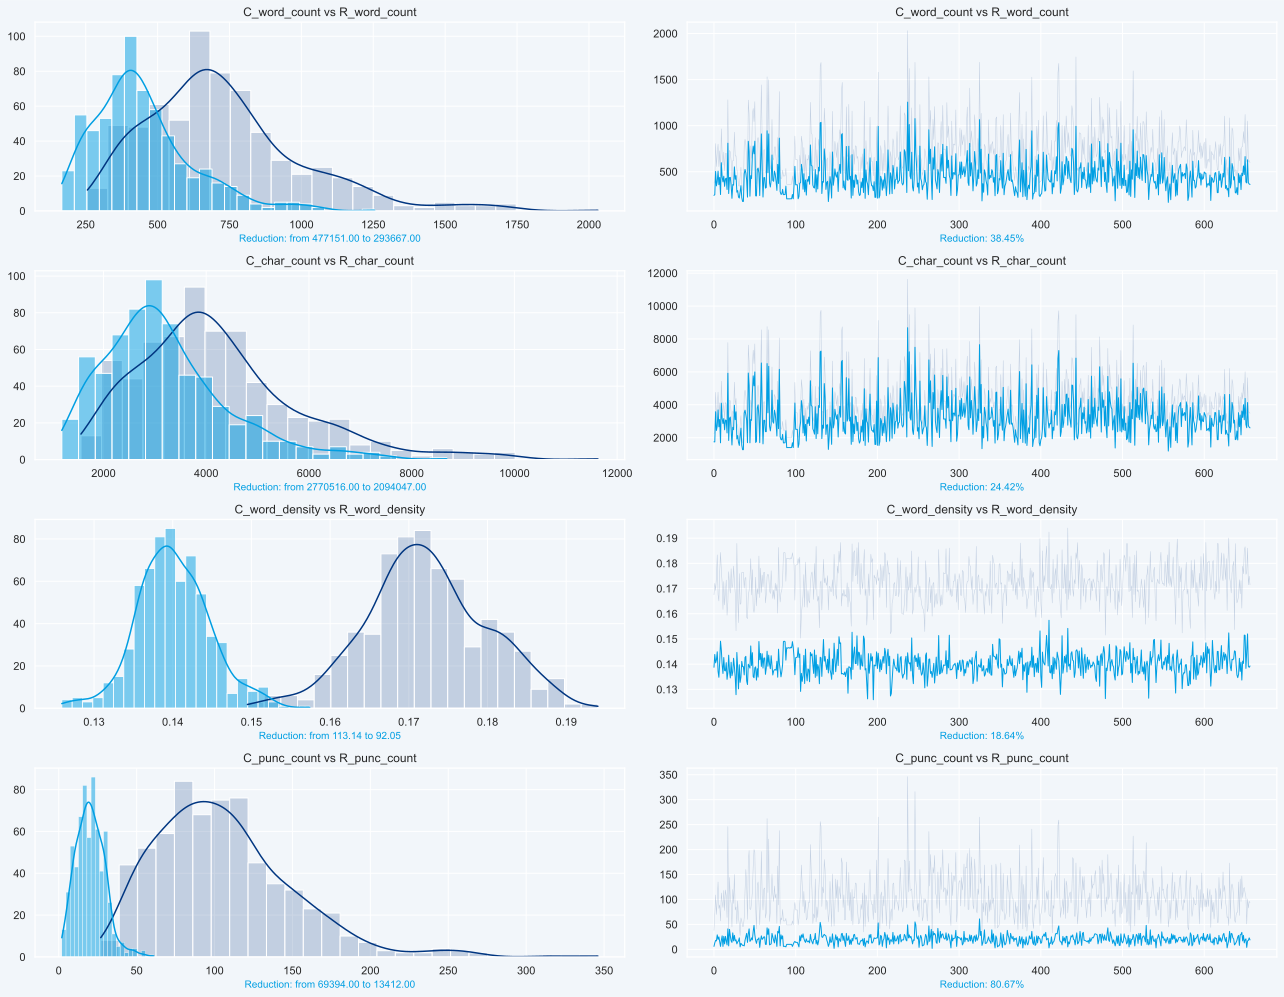

In [24]:
#Subplots
a = 4  #Number of rows
b = 2  #Number of columns
c = 1  #Initialize plot counter

fig = plt.figure(figsize=(18,14))

for i in range(4):
    
    #Bar plots
    plt.subplot(a, b, c)
    g1 = sns.histplot(data=df_stats_raw.iloc[:,i],color=blue_d, kde=True, alpha=.2)
    g2 = sns.histplot(data=df_stats_cleaned.iloc[:,i],color=blue_l, kde=True)
    
    #Bar labels
    g1.set_ylabel(None)
    g2.set_ylabel(None)
    g2.set_xlabel(('Reduction: from {:.2f} to {:.2f}'.format(df_stats_raw.iloc[:,i].sum(),df_stats_cleaned.iloc[:,i].sum())),fontsize=10 ,color=blue_l)
    g2.set_title('{}'.format(df_stats_cleaned.columns[i]+ ' vs ' + df_stats_raw.columns[i]))

    c = c + 1
    
    #Line plots
    plt.subplot(a, b, c)
    g3 = sns.lineplot(data=df_stats_raw, x=df_stats_raw.index, y=df_stats_raw.iloc[:,i], alpha=.2, linewidth=.5)
    g4 = sns.lineplot(data=df_stats_cleaned, x=df_stats_raw.index, y=df_stats_cleaned.iloc[:,i], linewidth=1)
    
    #Line labels
    g3.set_ylabel(None)
    g4.set_ylabel(None)
    g4.set_xlabel(('Reduction: {:.2f}%'.format(abs(((df_stats_cleaned.iloc[:,i].sum()-df_stats_raw.iloc[:,i].sum())/df_stats_raw.iloc[:,i].sum())*100))),fontsize=10,color=blue_l)
    g4.set_title('{}'.format(df_stats_cleaned.columns[i]+ ' vs ' + df_stats_raw.columns[i]))

    c = c + 1
    
plt.tight_layout()

### Inference:
> - After completing the text pre-processing phase we've successfully reduced noise and created more information dense descriptions
> - For every plot we see the Raw and Cleaned data matches in shape, meaning the reduction is mostly linear (higher word count raw means a higher word count cleaned)
> - Reductions of Word and Character count follow a similar pattern, as they are strongly correlated
> - The highest reduction rate is in Punctuation marks at 81%, the other 19% can be explained by contextual punctuation (Booking.com, state-of-the-art, etc.)

***

# BAG OF WORDS / NGRAM / ANALYSIS

In [25]:
'''# function to check if a bag's element is present in the text
def get_category(txt, bag):
    category = [x for x in bag if x in txt.lower()]
    if not category:
        category = [""]
    return category[0] '''

In [26]:
'''team_bag = ['engineering', 'agile', 'devops', 'kubernetes', 'java', 'programming', 'software development',
                        'cloud', 'spring', 'documentation', 'soa', 'technical leadership', 'jenkins', 'ci/cd'  
                        ]
df['BAG'] = df['Job Description - Cleaned'].apply(lambda x : get_category(x, team_bag))'''

In [27]:
#df['Job Description - Cleaned'][0]

'lead sourcer technology recruitment truly international team therefore position base amsterdam manchester dublin london book excite transition building source function ground look lead technology sourcer join new team lead sourcer responsible manage source strategy designate talent segment within technology hire partner recruiter hire team leadership lead strategic sourcing-related project wider talent acquisition team ambassador best practice around data management compliance expert source lead guide team pursuit hire goal deliver actionable insight business key task responsibility develop maintain strong relationship senior stakeholder provide strategic guidance advice true partnership leadership team conduct research map market generate candidate name profile develop creative source strategy close collaboration recruiting team continually contribute knowledge base talent acquisition team i.e leadership tech commercial provide education industry talent pool analyze sector issue tren

# Exploratory Analysis

We'll start by adding all data-related job descriptions together to find the most commonly used words on the Booking.com career site. Doing this will allow us to gain insight into what words the company uses to describe itself, their values, and what they seek in future employees. To get a more accurate reprentation of which key words matter most we'll filter out common stopwords. Though there are many libraries that provide lists of stopwords on various languages, we'll need to add a few more words that are specific to this platform.

In [28]:
descriptions = ''.join(d for d in df['Job Description - Cleaned']) #Looping over all cells in Job Description column and joining then together
print ("There are {} words in the combined data-related job descriptions.".format(len(descriptions))) #Printing results

There are 2387057 words in the combined data-related job descriptions.


In [29]:
word_count = dict(Counter(descriptions.split())) #Creating a dictionary of all words in split description
print('Without ranking the first 10 words look like: {}'.format(dict(itertools.islice(word_count.items(), 10))))

Without ranking the first 10 words look like: {'lead': 1080, 'sourcer': 9, 'technology': 1482, 'recruitment': 228, 'truly': 104, 'international': 146, 'team': 4011, 'therefore': 24, 'position': 263, 'base': 465}


In [30]:
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #Creating dictionary by most popular words by looping over our split descriptions dictionary
print('With ranking the first 10 words look like: {}'.format(dict(itertools.islice(words_popular.items(), 10))))

With ranking the first 10 words look like: {'experience': 4121, 'work': 4033, 'team': 4011, 'business': 3059, 'booking.com': 2913, 'product': 2893, 'world': 1910, 'data': 1872, 'partner': 1828, 'opportunity': 1744}


In [31]:
words_all_jobs = pd.DataFrame.from_dict(words_popular, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
words_all_jobs.head(10)

,index,Count
0,experience,4121
1,work,4033
2,team,4011
3,business,3059
4,booking.com,2913
5,product,2893
6,world,1910
7,data,1872
8,partner,1828
9,opportunity,1744


## Wordcloud

One way to make this intuitively insightful is to use a wordcloud, which displays the most common words in a visual manner. The size of each word corresponds to the frequency of its use.

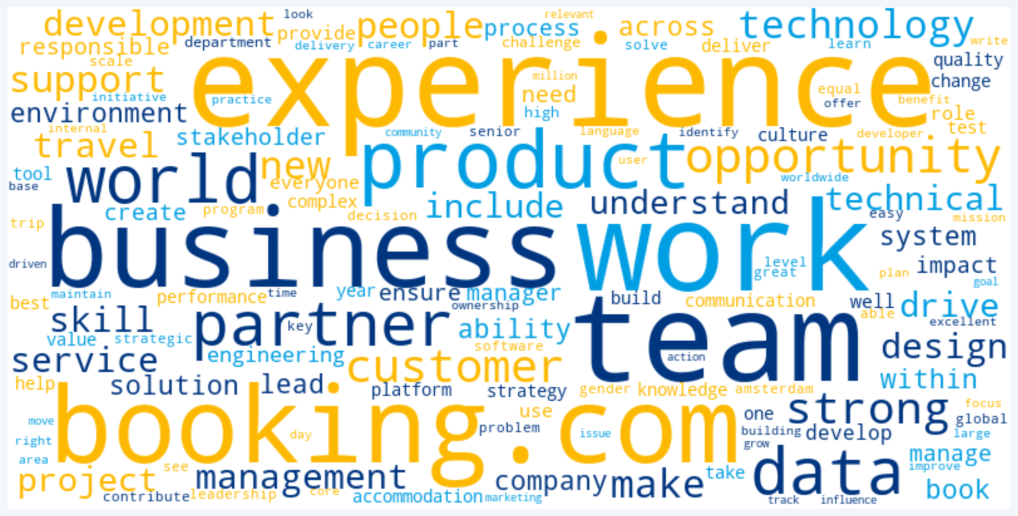

In [32]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='white').generate_from_frequencies(words_popular) #Generate wordcloud class from dictionary

plt.imshow(wordcloud.recolor(colormap=cmap3), interpolation='bilinear')
plt.axis('off')
plt.show();

### Inference:

> - A few words pop out immediately (Experience, Business, Team, Product, Work), so it's worth paying closer attention to the 'secondary' words as well.
> - **(Machine) Learning**: A general machine learning trend?
    - Treating these as seperate words loses out on possible overlap and will require further research
    - Correlation? Machine is often found in combination with Intelligence, Learning often turns up before Models and Code.
    - Overall, 'Machine' hints at strong ML-focus since it's a word rarely used outside of this context (in job positions).
    - Representation - How many jobs are ML-related and how much does this skew our vision of general Booking.com jobs descriptions?
> - **World**: as one of the world’s leading digital travel companies this emphasizes their global presence and state of mind.
> - **Empowerment**: we see a high frequency of words aligning with Booking.com values like: Vision, Development, Identify, Impact, and Ownership.

### Bar Chart

Wordclouds are great for getting a sense of what's important, but ranking the top 20 most relevant words becomes more difficult. That's why we use a bar chart to accurately rank and communicate our findings.

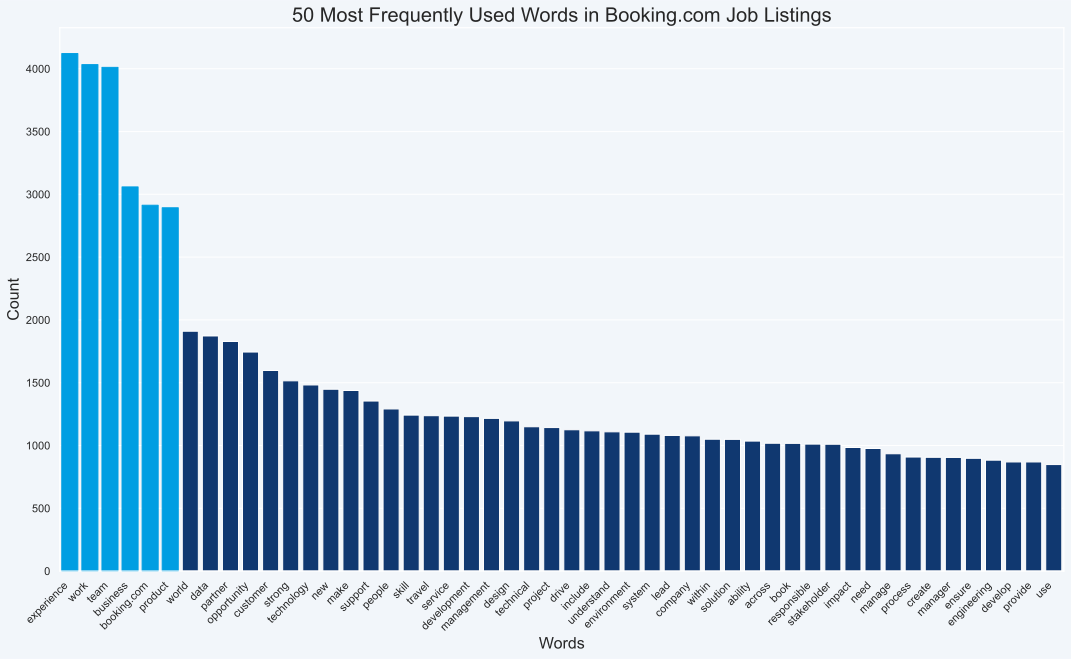

In [33]:
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Count',palette=c1)

for bar in ax.patches:
    if bar.get_x() < 5:
        bar.set_color(blue_l)

#ax.bar_label(ax.containers[0])

plt.xticks(rotation= 45, ha='right')
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('50 Most Frequently Used Words in Booking.com Job Listings', fontsize=20);

##### **Q:** How big a percentage of all words used is a Top 6 Word?

In [34]:
print('A: {:.2f}%'.format((words_all_jobs['Count'][:6].sum()/words_all_jobs['Count'].sum())*100))

A: 7.18%


Let's calculate the ratio of each of these words per job listing.

In [35]:
words_all_jobs['Ratio_Listings']= words_all_jobs['Count']/df.shape[0] #Creating new column for ratios
words_all_jobs

,index,Count,Ratio_Listings
0,experience,4121,6.27
1,work,4033,6.14
2,team,4011,6.11
3,business,3059,4.66
4,booking.com,2913,4.43
...,...,...,...
6951,compliance-ensuring,1,0.00
6952,business-intelligence,1,0.00
6953,organisationsenior,1,0.00
6954,deep-linking,1,0.00


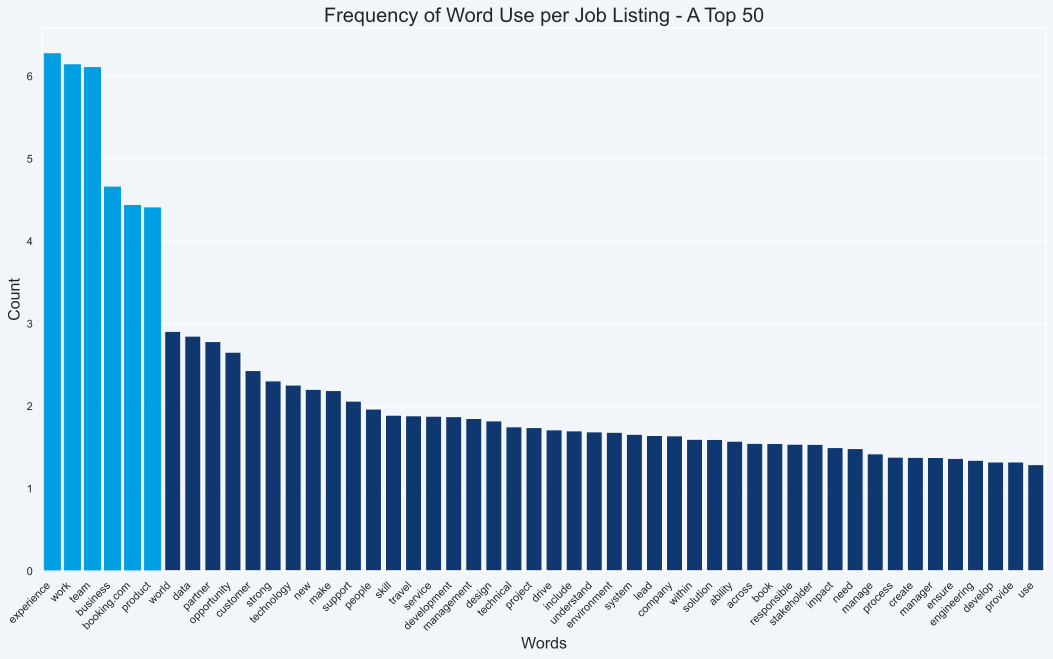

In [36]:
ax = sns.barplot(data=words_all_jobs[:50],x='index',y='Ratio_Listings', palette=c1)

for bar in ax.patches:
    if bar.get_x() < 5:
        bar.set_color(blue_l)    

#ax.bar_label(ax.containers[0],fmt='%.2f',padding= 10)
plt.xticks(rotation = 45, ha= 'right')
plt.xlabel('Words', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Frequency of Word Use per Job Listing - A Top 50', fontsize=20);

In [37]:
words_all_jobs['Ratio_Listings'][5]/words_all_jobs['Ratio_Listings'][6] #Ratio Product to World

1.5146596858638741

###### Bar chart - what did we learn?

- Top 6 hegemony:
    - The differences between the 6 most used words and the rest is substatial, almost **7,18%** of all words* used is Experience, Work, Team, Business, Booking.com or Product
    - Top 6 words are at least **1,5 times** more frequenty than other words
    - Top 6 words are all used **over 4 times** per job listing, with the top 3 used of **6 times** (on average)
    
***    
\* _'all words' refers to the cleaned word list, excluding all stopwords. This means the percentages do not represent an absolute, but rather relative number._

## Job Titles

Now let's focus on the Job Titles to further out understanding of roles within Booking.com.

Create a new Dataframe with Job Titles as index. This way, we can locate job descriptions based on job titles.

In [38]:
print('The amount of unique Job Titles is {:.2f}%'.format((df['Job Title'].nunique() / df['Job Title'].count()) * 100))

The amount of unique Job Titles is 96.65%


Almost all Job Titles are unique, meaning that we have to try a bit harder if we want to apply categorization. This mainly stems from the concatenation of title + team + location (e.g. 'Data Engineer Payments - Amsterdam')

In [39]:
df['Job Title'].sample(5) #Get sample of Job Titles

463    Senior Site Reliability Engineer - Data & ML Platform
585                       Data Scientist Insights-China Tech
284                          Senior Account Manager - Poland
8                    Customer Sales Advisor - French Speaker
355                     PhD Machine Learning Research Intern
Name: Job Title, dtype: object

In order to sort Job Descriptions by similarity we can use Job Titles to categorize them. Thankfully, the Booking.com Career platform have a handy set of teams it uses to sort by.

<p align="center">
<img src="Images/booking_teams.jpg" style>
</p>

Job positions generally do not fall exclusively in one category, so there will be a lot of overlap. Sorting a Job Title like 'Data Analyst' in the 'Data Science & Analytics' seems intuitive, but where does 'Senior Data Engineer - Data & Machine Learning Platform' fall? In order to categorize, we have to generalize.

#### Initial observations:
- Looking at the list above, we can see a lot of jobs have a location after the title, for the purposes of this analysis it can safely be ignored.
- To reduce overlap and create more distinct categories we opt to make a 'Legal' seperate entry and remove 'Public Affairs'
- 'Leadership' is a role, rather than a team - and is exluded from the list.
- All Product related skills have been categorized into 'Product'.

In [40]:
#Creating dictionary of teams and skills from Booking.com career platform
skills_dict = {'Business Development & Support': ['Communication', 'Positioning', 'Business Development','Planning',
                                                'Customer Service', 'Reporting', 'Account Management',
                                                'Governance', 'Agile', 'Change Management', 'Compliance', 'Risk Assessment',
                                                'People Management', 'Innovation', 'Strategy', 'Service Delivery'
                                                ],
                                            
        'Customer Service': ['Customer Service', 'Training', 'Microsoft Office', 'Sales', 'Communication', 'Languages', 'Investments'],
         
        'Data Science & Analytics': ['Sql', 'Python', 'Data Analysis', 'Tableau', 'Data Science', 'R', 'Visualization', 'Insights', 
                                    'Artificial Intelligence', 'Analytics', 'Hadoop', 'Spark', 'Statistics', 'Implementation', 
                                    'Data Management', 'Dashboards', 'Machine Learning', 'Graphite'
                                    ],
        
        'Design & User Experience':['Testing', 'Agile', 'Design Process', 'Mentoring', 'Six Sigma', 
                                    'Saas', 'Prototyping', 'Css', 'Html', 'Copywriting', 'User Flows', 
                                    'Adobe', 'Research', 'Invision', 'Ios', 'Android', 'User Experience'
                                    ],
        
        'Engineering': ['Engineering', 'Agile', 'Devops', 'Kubernetes', 'Java', 'Programming', 'Software Development',
                        'Cloud', 'Spring', 'Documentation', 'Soa', 'Technical Leadership', 'Jenkins', 'Ci/cd'  
                        ],
        
        'Finance': ['Finance', 'Operations', 'Sap', 'Budget', 'Compliance', 'General Ledger', 'Financial Planning', 
                    'Consolidation', 'Financial Analysis', 'Variance Analysis', 'Reporting', 'Audit', 'Data Entry', 
                    'Bookkeeping', 'Word'
                    ],
        
        'Legal': ['Negotiation', 'Accounts Receivable', 'Invoicing', 'Litigation', 'Internal Audit', 'Investigation',      
                'Drafting', 'Compliance', 'Regulatory', 'Legal Research', 'Legal Writing', 'Reviewing Contracts', 
                'Commercial Law', 'Financial Crime', 'Bribery', 'Ofac', 'Aml', 'Governance', 'Intellectual Property'
                ],
        
        'IT Services': ['Active Directory', 'Technical Support', 'Troubleshooting', 'Python', 'Configuration', 
                        'Testing', 'Logging', 'Vpn', 'Itil', 'Deployment', 'Maintenance', 
                        'Wireless', 'Security', 'Installation', 'Wan'
                        ],
                
        'Marketing & Communications': ['Social Media', 'Marketing', 'E-commerce', 'Media Engagement', 
                                    'Branding', 'Content Management', 'Editing', 'Crm', 'Campaign', 
                                    'Segmentation', 'Positioning'
                                    ],
        
        'People': ['Employee Relations', 'Talent Acquisition', 'Performance Management', 'Stakeholder Management', 
                    'Onboarding', 'Talent Management', 'Organizational Development', 'Workday', 'Administration', 
                    'Hr Process', 'Hr Operations', 'Hris', 'Hr', 'Relationship Management'
                    ],
        
        'Product': ['Product Management', 'Product Design', 'Project Management', 'Product Development', 
                    'Api', 'Product Lifecycle', 'Product Delivery', 'Product Strategy'            
                    ],
        
        'Security & Infrastructure': ['Linux', 'Networking', 'Security', 'Ansible', 'Cloud Computing', 'Automation', 
                                    'Infrastructure', 'Architecture', 'Docker', 'Distributed Systems', 'Mysql', 
                                    'Terraform', 'Openstack', 'Perl'
                                    ]
        }

In [41]:
df_team = df[['Job Title','Job Description - Cleaned']].copy()

# Proper syntax, clean up code, comment and markup

In [42]:
def skill_finder(team):
    df_team[team] = 0 #Settings initial value to 0
    skills = skills_dict[team] #Set skills to matching skill-set (values) of dictionary
    skills = [x.lower() for x in skills] #Lower strings in skills list
   

    for i in range(df_team.shape[0]):
        description = df_team['Job Description - Cleaned'][i]
        for j in range(len(skills)):
            if str(skills[j]) in description:
                df_team[team][i] += 1

    return df_team

In [43]:
for key, value in skills_dict.items():
    skill_finder(key)

df_team

,Job Title,Job Description - Cleaned,Business Development & Support,Customer Service,Data Science & Analytics,Design & User Experience,Engineering,Finance,Legal,IT Services,Marketing & Communications,People,Product,Security & Infrastructure
0,Lead Sourcer - Tech,lead sourcer technology recruitment truly international team therefore position base amsterdam manchester dublin london book excite transition building source function ground look lead technology sourcer join new team lead sourcer responsible manage source strategy designate talent segment within technology hire partner recruiter hire team leadership lead strategic sourcing-related project wider talent acquisition team ambassador best practice around data management compliance expert source ...,2,0,2,1,0,1,1,0,0,1,1,0
1,Senior Data Scientist - Accommodations,booking.com look data savvy professional join team data scientist work stakeholder throughout company generate understand strategy suggest action base data consider unique hybrid data hacker business analyst communicator mentor maintains strong customer focus value pragmatism perfection like hear several data science team within booking.com consist 3-8 people team scope within business data scientist focus front end website content page demand product customer satisfaction loyalty every team...,2,2,6,0,1,0,0,1,0,1,0,0
2,Senior Data Analyst - Accommodations,booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people make easy everyone experience world 1.6 million room night book every day accommodation represent large share business date mission deliver best customer experience varied selection property booking.com combine best trait start-up resource planet earth accommodation ...,4,1,6,0,1,1,0,1,0,2,1,0
3,UX Designer,role booking.com mission make easy everyone experience world work collaboration lead industry partner insurance product design give customer assurance protection need allow relax enjoy trip great value cover back first class experience need make claim look designer join team excite journey help improve exist insurance product help bring valuable new insurance product market team booking.com insurance easy way protect trip travel peace mind part connect trip vision booking.com ambitious growt...,2,0,1,3,2,0,0,0,0,0,2,0
4,Account Manager - Sochi,company long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission un...,1,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Technical Programme Manager,booking.com make easy everyone experience world begin take hotel booking online year ago shape travel industry ever since today building platform connects part trip accommodation transport ticket tour manchester transportation team help people get want anywhere world whether customer want freedom car ease taxi economy public transport make possible team passionate help people travel see challenge opportunity always ready change cross functional agile team product continuous delivery devops e...,5,1,2,1,3,1,1,1,0,1,0,1
653,Senior Java Developer,senior java developer booking.com make easy everyone experience world begin take hotel booking online year ago shape travel industry ever since today building platform connects part trip accommodation transport ticket tour manchester trip business unit help people get want anywhere world whether customer want freedom car ease taxi economy public transpo

# Add label of highest bars to chart - e.g. Data Analyst

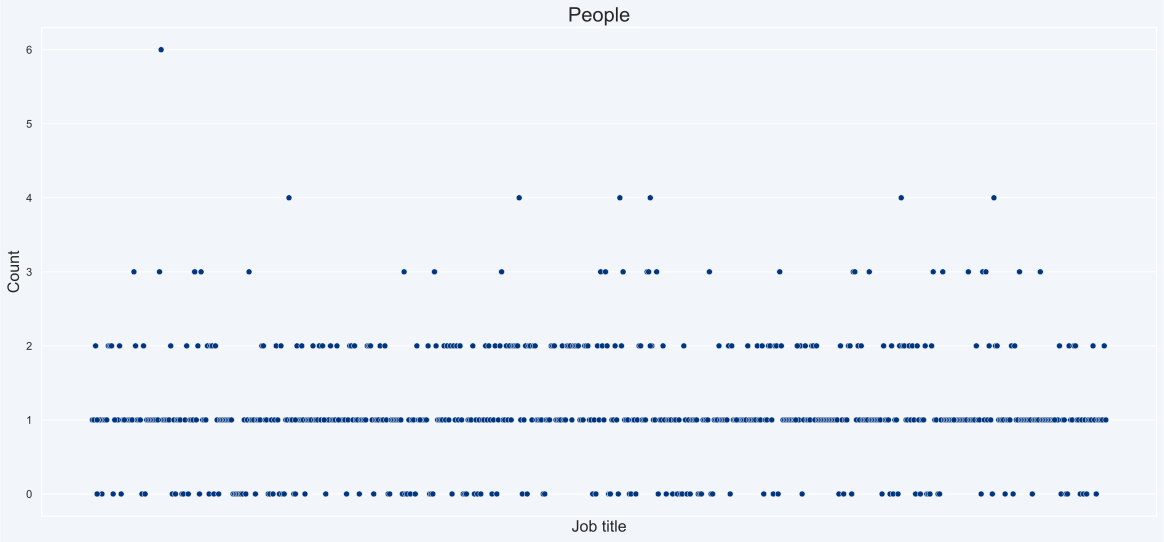

In [44]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.scatterplot(data=df_team, x='Job Title', y='People', palette=c1,ax=ax)

for bar in ax.patches:
    if bar.get_height() > 2:
        bar.set_color(blue_l)    
        
ax.axes.xaxis.set_ticks([])
plt.xlabel('Job title', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('People', fontsize=20);


In [75]:
L = df_team.drop(columns=['Job Title','Job Description - Cleaned'])
L = L.head(10).T

<AxesSubplot:>

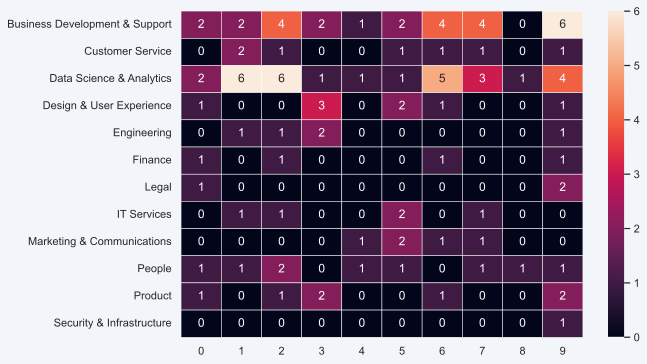

In [76]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(L, annot=True, fmt="d", linewidths=.5, ax=ax)

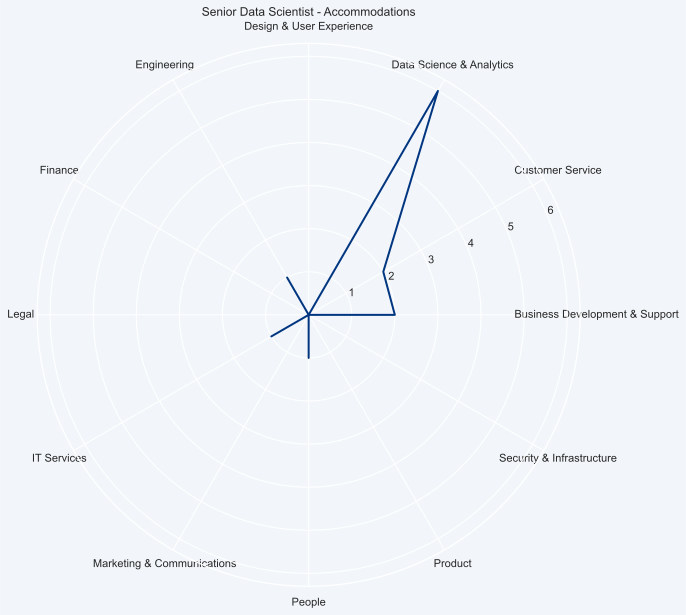

In [125]:
labels=np.array(list(skills_dict.keys()))
stats=df_team.loc[1,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, linewidth=2)
#ax.fill(angles, stats, alpha=0.25)
plt.xticks(angles[:-1],labels)

ax.set_title(df.loc[1][0])
#ax.grid(True)
plt.show()



In [80]:
for key, value in skills_dict.items():
    key

In [86]:
labels=np.array(list(skills_dict.keys()))
labels

array(['Business Development & Support', 'Customer Service',
       'Data Science & Analytics', 'Design & User Experience',
       'Engineering', 'Finance', 'Legal', 'IT Services',
       'Marketing & Communications', 'People', 'Product',
       'Security & Infrastructure'], dtype='<U30')

In [126]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

AttributeError: 'Rectangle' object has no property 'colors'

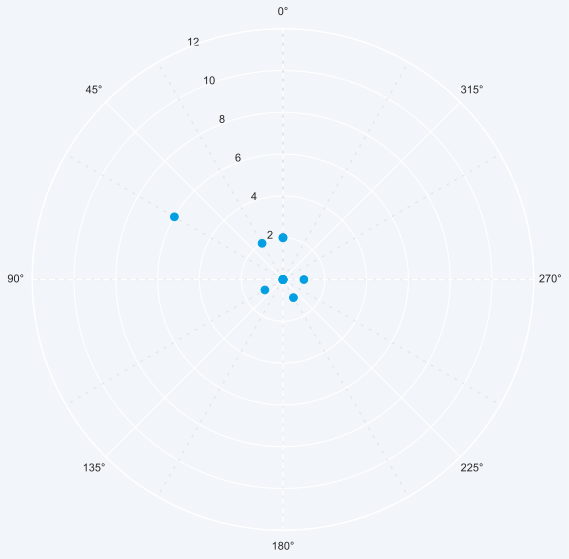

In [201]:
labels=np.array(list(skills_dict.keys()))
stats=df_team.loc[1,labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})
ax.set_theta_offset(np.pi / 2)
ax.set_ylim(0, 12)
ax.vlines(angles, 0, 12, color=grey, alpha=.1, ls=(0, (2, 4)), zorder=11)
ax.scatter(angles,stats, s=60, color=blue_l, zorder=11)
ax.bar(angles, stats, colors=colors, alpha=0.9, width=0.52, zorder=10)

plt.xticks(angles[:-1],labels,zorder=1)
ax.xaxis.grid(False)

ax.set_title(df.loc[1][0])


XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(30)


In [202]:
# Colors
c2

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', c5, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=0, vmax=12)

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
colors = cmap(norm(stats))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [150]:
df_team.iloc[:,2:].max()

Business Development & Support     9
Customer Service                   3
Data Science & Analytics          11
Design & User Experience           8
Engineering                       10
Finance                            8
Legal                              6
IT Services                        7
Marketing & Communications         4
People                             6
Product                            5
Security & Infrastructure          9
dtype: int64

In [203]:
stats

array([2, 2, 6, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2], dtype=object)

NameError: name 'skills_list' is not defined

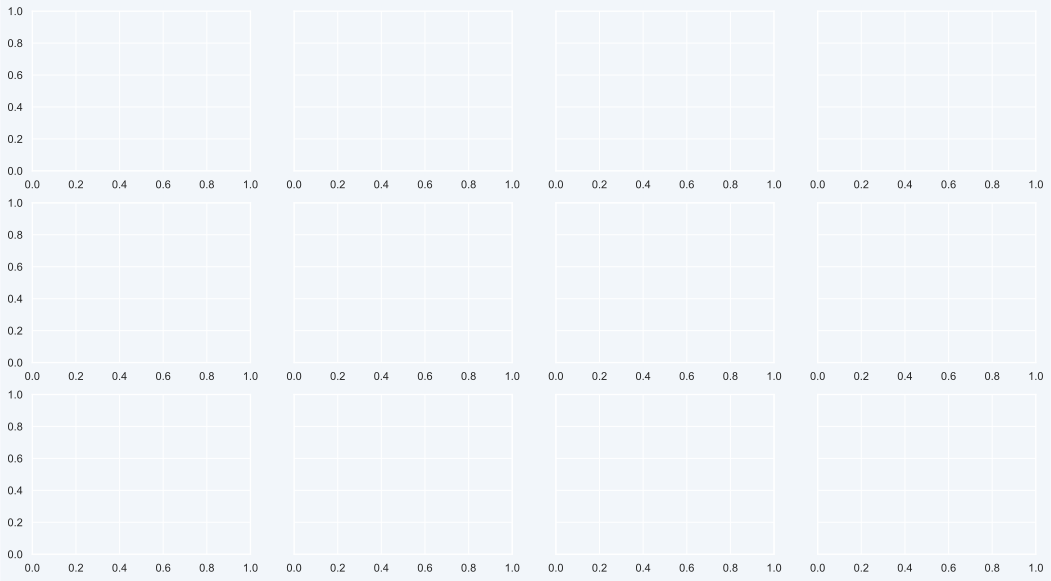

In [45]:
fig, axes = plt.subplots(ncols=4, nrows=3, sharey=True)

for i, ax in zip(range(12), axes.flat):
    sns.barplot(data=df_team, x='Job Title', y=skills_list[i], ax=ax);

# Style charts, sort out X labels - how can we make this more insightful?

In [ ]:
skills_list = list(skills_dict.keys())

In [ ]:
for key, value in skills_dict.items():
    print(key)

### Function Extracting cleaned DF from Job Title

In order to compare the skills, experience and responsiblities between positions we create a function that does all the cleaning of text for us. This function is largely inherented from our previous cleaning efforts, but its structure allows us to iterate over all positions seperately.

With our previous analysis of all job descriptions we have created a baseline against which we can set our new findings.

In [ ]:
df_titles = df.copy().set_index('Job Title')

In [ ]:
def word_ranker(job_title):
    words = cleanDescription(job_title, 'w')
    
    word_count = dict(Counter(words)) #Creating a dictionary of all words in split description
    words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #Sorting dictionary by most popular words
    words_all_jobs = pd.DataFrame.from_dict(words_popular, orient='index',columns=['Count']).reset_index() #Create our cleaned dataframe
    
    return words_all_jobs

word_ranker('Senior Machine Learning Scientist - Safety')

***
#  TO DO:
***

# Sort out structure and when to implement functions

# This creates set of wordclouds for all columns:
# Transform into use for teams

In [ ]:
'''for index, comedian in enumerate(df.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()'''

In [ ]:
'''df['word_count'] = df['headline_text'].apply(lambda x : len(x.split()))
df['char_count'] = df['headline_text'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df['punc_count'] = df['headline_text'].apply(lambda x : len([a for a in x if a in punc]))

df[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)'''

# Get statistics on text - visualize wordcount etc.

# Statistical plots

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4)

#Bins
bins_word_count = np.histogram_bin_edges([0, 1500], bins=30)
bins_char_count = np.histogram_bin_edges([0, 10000], bins=30)
bins_word_density = np.histogram_bin_edges([.12, .2], bins=30)
bins_punc_count = np.histogram_bin_edges([0, 200], bins=50)


#Sorted dataframes
sorted_word_count = df.sort_values(by='R_word_count')
sorted_char_count = df.sort_values(by='R_char_count')
sorted_word_density = df.sort_values(by='R_word_density')
sorted_punc_count = df.sort_values(by='R_punc_count')


#Plots
sns.histplot(data=df, x='R_word_count', bins=bins_word_count, color=blue_d, kde=True, ax=ax[0,0])
sns.histplot(data=df, x='C_word_count', bins=bins_word_count, color=blue_l, kde=True, ax=ax[0,0])

sns.histplot(data=df, x='R_char_count', bins=bins_char_count, color=blue_d, kde=True, ax=ax[1,0])
sns.histplot(data=df, x='C_char_count', bins=bins_char_count, color=blue_l, kde=True, ax=ax[1,0])

sns.histplot(data=df, x='R_word_density', bins=bins_word_density, color=blue_d, kde=True, ax=ax[2,0])
sns.histplot(data=df, x='C_word_density', bins=bins_word_density, color=blue_l, kde=True, ax=ax[2,0])

sns.histplot(data=df, x='R_punc_count', bins=bins_punc_count, color=blue_d, kde=True, ax=ax[3,0])
sns.histplot(data=df, x='C_punc_count', bins=bins_punc_count, color=blue_l, kde=True, ax=ax[3,0]);

sns.lineplot(data=sorted_word_count, x='Job Title', y='R_word_count', ax=ax[0,1])
sns.lineplot(data=sorted_word_count, x='Job Title', y='C_word_count', ax=ax[0,1])

sns.lineplot(data=sorted_char_count, x='Job Title', y='R_char_count', ax=ax[1,1])
sns.lineplot(data=sorted_char_count, x='Job Title', y='C_char_count', ax=ax[1,1])

sns.lineplot(data=sorted_char_count, x='Job Title', y='R_word_density', ax=ax[2,1])
sns.lineplot(data=sorted_char_count, x='Job Title', y='C_word_density', ax=ax[2,1])

sns.lineplot(data=sorted_char_count, x='Job Title', y='R_punc_count', ax=ax[3,1])
sns.lineplot(data=sorted_char_count, x='Job Title', y='C_punc_count', ax=ax[3,1])

# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(7))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))

#Hide X ticks (Job Titles)
ax.flat[1].tick_params(labelbottom=False)
ax.flat[3].tick_params(labelbottom=False)
ax.flat[5].tick_params(labelbottom=False)
ax.flat[7].tick_params(labelbottom=False)

plt.tight_layout()